In [1]:
# Dataset para Análise: HQFS

In [39]:
import os
import munch
import joblib
import numpy as np
import matplotlib.pyplot as plt
from openTSNE import TSNE
from IPython.display import clear_output

%matplotlib inline

In [40]:
class_colors = {
    0.0: 'lightgreen',
    1.0: 'red',
}

In [42]:
data_rgb = np.load("...hqfs-i3d-rgb-test-cam2.npy",allow_pickle=True)
data_flow = np.load("...hqfs-i3d-flow-test-cam2.npy",allow_pickle=True)

In [43]:
data_rgb_norm = [d for d in data_rgb if d["y_i"] == 0.0 ]
data_rgb_anom = [d for d in data_rgb if d["y_i"] == 1.0 ]

In [44]:
data_flow_norm = [d for d in data_flow if d["y_i"] == 0.0 ]
data_flow_anom = [d for d in data_flow if d["y_i"] == 1.0 ]

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, perplexity=500, verbose=True)
--------------------------------------------------------------------------------
===> Finding 1500 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 2.16 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.94 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.04 seconds
===> Running optimization with exaggeration=12.00, lr=295.58 for 250 iterations...
Iteration   50, KL divergence 1.4475, 50 iterations in 38.2487 sec
Iteration  100, KL divergence 1.3358, 50 iterations in 8.7151 sec
Iteration  150, KL divergence 1.3455, 50 iterations in 12.2300 sec
Iteration  200, KL divergence 1.3372, 50 iterations in 13.8727 sec
Iteration  250, KL divergence 1.3371, 50 iterations in 13.0922 sec
   --> Time elapsed: 86.16 seconds
===> Running optimization with exaggera

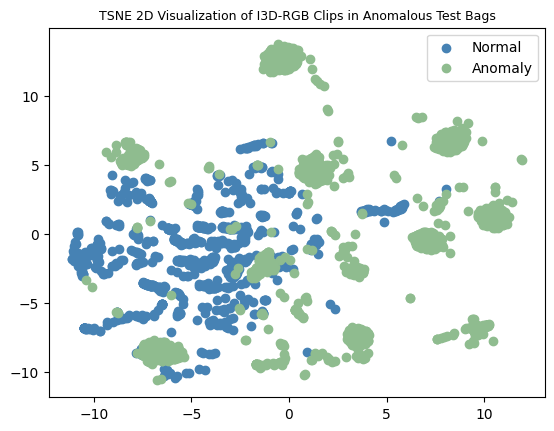

In [49]:
tsne = TSNE(n_jobs=-1, perplexity=500, verbose=True)
X_1024d = np.vstack([data_rgb_anom[i]["X_i"] for i in range(len(data_rgb_anom)) ])
X_2d = tsne.fit(X_1024d)
y_01 = np.hstack([ np.array(data_rgb_anom[i]["y_fi"].sum(axis=1) > 0. ).astype(float)
     for i in range(len(data_rgb_anom)) 
])
#clear_output()
tmp = np.hstack([X_2d, y_01.reshape([len(y_01), 1]) ])
tmp0, tmp1 = tmp[ tmp[:, -1] == 0 ], tmp[ tmp[:, -1] == 1 ]
plt.scatter(tmp0[:, 0], tmp0[:, 1], color='steelblue', label='Normal')
plt.scatter(tmp1[:, 0], tmp1[:, 1], color='darkseagreen', label='Anomaly')
plt.legend()
plt.title(f"TSNE 2D Visualization of I3D-RGB Clips in Anomalous Test Bags", fontsize=9)
plt.show()

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, perplexity=500, verbose=True)
--------------------------------------------------------------------------------
===> Finding 1500 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 2.06 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 2.55 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=12.00, lr=295.58 for 250 iterations...
Iteration   50, KL divergence -1.4088, 50 iterations in 26.8715 sec
Iteration  100, KL divergence 0.2360, 50 iterations in 18.5110 sec
Iteration  150, KL divergence -0.1861, 50 iterations in 10.5737 sec
Iteration  200, KL divergence 0.2895, 50 iterations in 11.2913 sec
Iteration  250, KL divergence 0.3055, 50 iterations in 13.3348 sec
   --> Time elapsed: 80.58 seconds
===> Running optimization with exagg

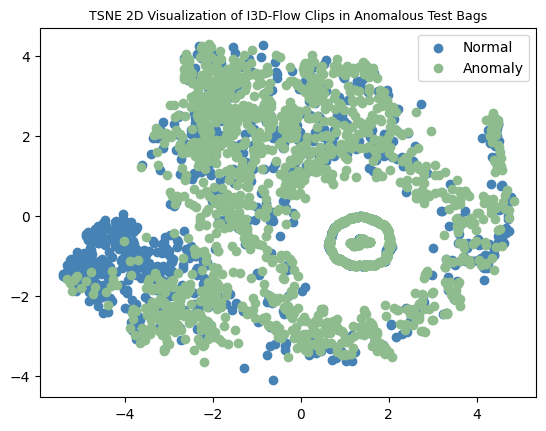

In [50]:
tsne = TSNE(n_jobs=-1, perplexity=500, verbose=True)
X_1024d = np.vstack([data_flow_anom[i]["X_i"] for i in range(len(data_flow_anom)) ])
X_2d = tsne.fit(X_1024d)
y_01 = np.hstack([ np.array(data_flow_anom[i]["y_fi"].sum(axis=1) > 0. ).astype(float)
     for i in range(len(data_flow_anom)) 
])
#clear_output()
tmp = np.hstack([X_2d, y_01.reshape([len(y_01), 1]) ])
tmp0, tmp1 = tmp[ tmp[:, -1] == 0 ], tmp[ tmp[:, -1] == 1 ]
plt.scatter(tmp0[:, 0], tmp0[:, 1], color='steelblue', label='Normal')
plt.scatter(tmp1[:, 0], tmp1[:, 1], color='darkseagreen', label='Anomaly')
plt.legend()
plt.title(f"TSNE 2D Visualization of I3D-Flow Clips in Anomalous Test Bags", fontsize=9)
plt.show()